# Telecom Churn Prediction

##  Table of Contents
1. [Business Understanding](#1-business-understanding)
    - [Overview](#overview)
    - [Problem Statement](#problem-statement)
    - [Project Objectives](#project-objectives)
    - [Key KPI](#key-kpi)
2. [Data Understanding](#2-data-understanding)
3. [Data Preparation](#3-data-preparation)
4. [Exploratory Data Analysis (EDA)](#4-exploratory-data-analysis-eda)
    - [Feature Types](#feature-types)
    - [Analysis on churn Feature](#analysis-on-churn-feature)
    - [Area Code Analysis](#analysis-on-area-code)
    - [Distribution Plots](#distrubution-plots-for-numeric-features)
    - [Correlation Heatmap](#correlation-heatmap-for-numeric-features)
    - [Categorical Features Analysis](#categorical-features-analysis)
    - [Outlier Detection & Treatment](#outlier-detection--treatment)
5. [Modeling](#modeling)
    - [Logistic Regression](#model-1-logistic-regression-classifier)
    - [Random Forest](#model-2---random-forest-classifier)
    - [Decision Tree](#model-3---decision-tree-classifier)
    - [Model Comparison](#general-comaparison-between-lr-and-rf)
6. [Business Insights & Recommendations](#business-insights-from-feature-importance)
7. [Recommended Model](#recommended-model)


# Telecom Churn Prediction

# 1. Business Understanding
### Overview
Customer churn (or the loss of customers) is a major challenge for telecom companies like SyriaTel because acquiring new customers is far more expensive than retaining existing ones. High churn rates negatively impact profitability and market share.

This project leverages historical customer data to predict churn, enabling proactive measures to improve retention and customer satisfaction.

Problem statement
- SyriaTel is experiencing customer churn, directly impacting revenue.
- Lack of understanding of churn drivers prevents effective retention strategies.
- Goal: Predict which customers are likely to churn and identify key influencing factors.

Project Objectives
- Predict customer churn using machine learning models.
- Identify important features contributing to churn.
- Provide actionable business recommendations for retention.

Key KPI
- Recall>precision because false Negative hurts more

## 2. Data Understanding
- Dataset source [kaggle](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset?resource=download).
- Basic info (shape,info,describe) 
- Missing values & duplicates check.

Importing Required Libraries


In [271]:
# Import modules & packages

# Data manipulation 
import pandas as pd 
import numpy as np 

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV #splitting the dataset into test-train
from imblearn.over_sampling import SMOTE #SMOTE technique to deal with unbalanced data problem
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report # performance metrics
from sklearn.preprocessing import MinMaxScaler # to scale the numeric features
from scipy import stats
from sklearn.preprocessing import StandardScaler


# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [272]:
# Loading the dataset
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [273]:
# General information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

# 3. Data Preparation

This section prepares the data for EDA and modeling. The dataset will be checked for:

- duplicated rows
- missing values
- irrelevant columns as they may not add to the analysis

In [274]:
# Check for duplicated rows.
df.duplicated().sum()
# No duplicated rows to deal with

0

In [275]:
# Check for missing values, no missing values.
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [276]:
# Remove customer number feature it is contact information on the client and adds no value to the analysis
# Recheck dataframe
df.drop(['phone number'],axis=1,inplace=True)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [277]:
# Check the number of unique values in all columns to determine feature type
df.nunique()

state                       51
account length             212
area code                    3
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

# 4. Exploratory Data Analysis (EDA)

Feature Types

- Continuous Features: account length, number vmail messages, total day minutes, total day calls, total day charge, total eve minutes, total eve calls, total eve charge, total night minutes, total night calls, total night charge, total intl minutes, total intl charge and customer service calls

- Categorical Features:state, area code, international plan and voicemail plan

In [278]:
# Create numeric & categorical lists
numeric_cols = ['account length','number vmail messages','total day minutes','total day calls','total day charge',
                'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
                'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']
categoric_cols = ['state','area code','international plan','voice mail plan']

Analysis on 'churn' Feature
- Churn will be used as the dependent variable in this analysis. (y-axis)
- Churn indicates if a customer has terminated their contract with SyriaTel. True indicates they have terminated and false indicates they have not and have and have an existing account.

False    2850
True      483
Name: churn, dtype: int64


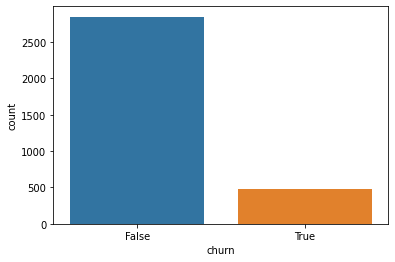

In [279]:
# Countplot of churn feature
print(df.churn.value_counts())
sns.countplot(data=df, x='churn');

Of the 3,333 customers in the dataset, 483 have terminated their contract with SyriaTel. That is 14.5% of customers lost.

From the distribution of the binary classes above, we find out a data imbalance and the imbalance has to be addressed  before modeling as an unbalanced feature may cause the model to make false predictions.

## Analysis on "area code" 
The area code is analysed first under categorical because of its uniquenes for the telco,since it adds a geospatial dimension and assists in
- Understanding whether churn is localized and actionable at a regional level.
- To understand how balanced or imbalanced the data is and check whether the feature can provide meaningful insights for churn prediction

In [280]:
# Calculate area code distribution
area = df['area code'].value_counts()

# Create pie chart with labels and percentages
figure = px.pie(
    names=area.index,        # area codes
    values=area.values,      # counts
    hole=0.5,
    title='Distribution of Area Code Feature'
)

# Show both label and percent inside the slices
figure.update_traces(
    textinfo='label+percent',
    textfont_size=14
)

figure.show()


The majority of customers are from area code 415 (49.5%), followed by 510 (25.5%) and 408 (25%). This imbalance suggests that the dataset is heavily concentrated in a single region.

Since churn patterns differ by location, this could introduce bias in the model hence need to check churn rates by area code and possibly balance the dataset.

After identifying where our customer are, there is need to Combines Location (Area Code) and Behavior (Customer Service Calls) that will assist in revealing whether service-related issues differ by region.

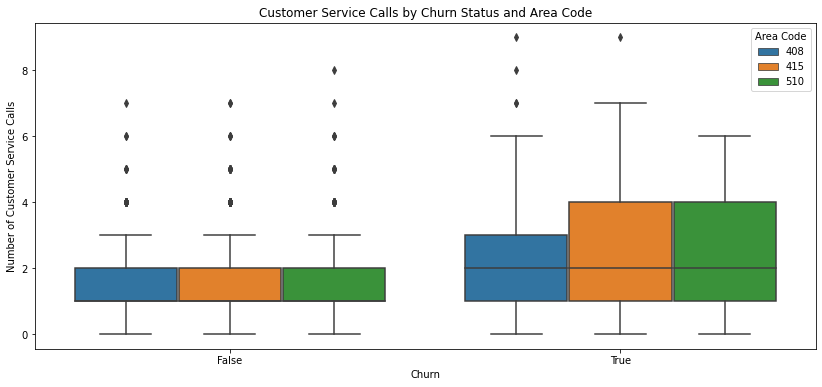

In [281]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='churn', y='customer service calls', hue='area code')
plt.title('Customer Service Calls by Churn Status and Area Code')
plt.xlabel('Churn')
plt.ylabel('Number of Customer Service Calls')
plt.legend(title='Area Code')
plt.show()


- From the boxplot, churned customers generally make more customer service calls than non-churners, suggesting unresolved issues may lead to churn. This pattern is consistent across all area codes, although area code 415 exhibits the highest median number of calls among churned customers, indicating potential service challenges in that region. 
- Additionally, the presence of multiple outliers for churned customers suggests that some individuals experience extreme dissatisfaction, making targeted interventions crucial. 
- Non-churned customers typically have fewer and less variable calls, reinforcing the link between frequent service interactions and churn risk.

## Distrubution Plots for Numeric Features

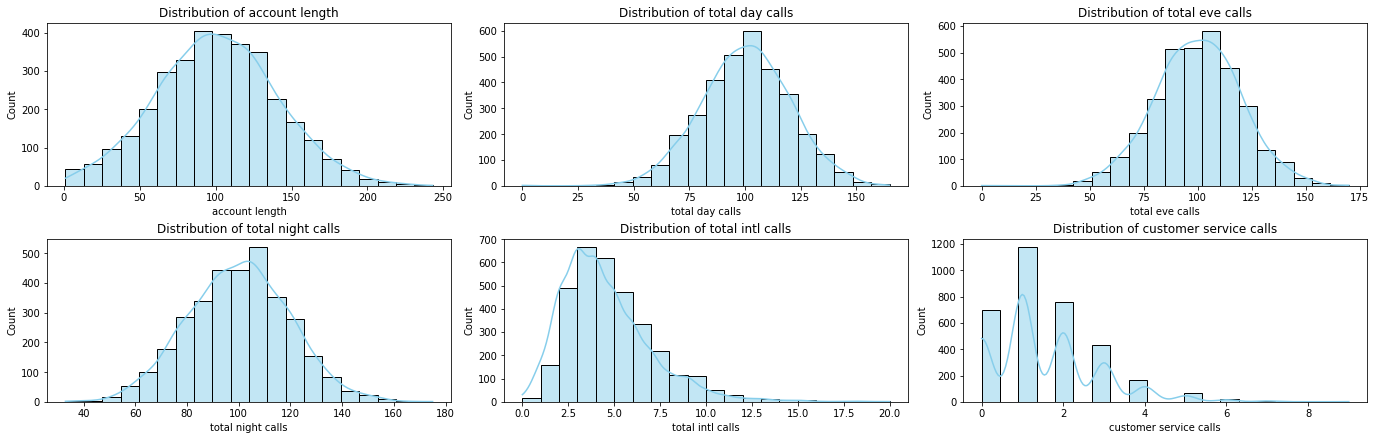

In [282]:
fig, ax = plt.subplots(2, 3, figsize=(19, 6), constrained_layout=True)

features = [
    "account length", "total day calls", "total eve calls",
    "total night calls", "total intl calls", "customer service calls"
]

for i, feature in enumerate(features):
    r, c = divmod(i, 3)
    sns.histplot(df[feature], bins=20, kde=True, ax=ax[r, c], color='skyblue')
    ax[r, c].set_title(f'Distribution of {feature}')
    ax[r, c].set_xlabel(feature)

plt.show()

From these distributions:
- All of them except customer service calls, have a normal distribution. Total international calls seems to be skewed to the right side however it is still normally distributed.
- Customer service calls has a few peaks, which indicates there are a few modes in the population. 

### Visualize relationships among multiple numeric features and see how they differ by a categorical variable (like churn)
These pairplot shows:
- Whether churned customers cluster differently than non-churners.
- Any linear/non-linear patterns between features (e.g., do customers with high day calls also have high evening calls?).
- Potential collinearity (e.g., total day calls vs total eve calls).

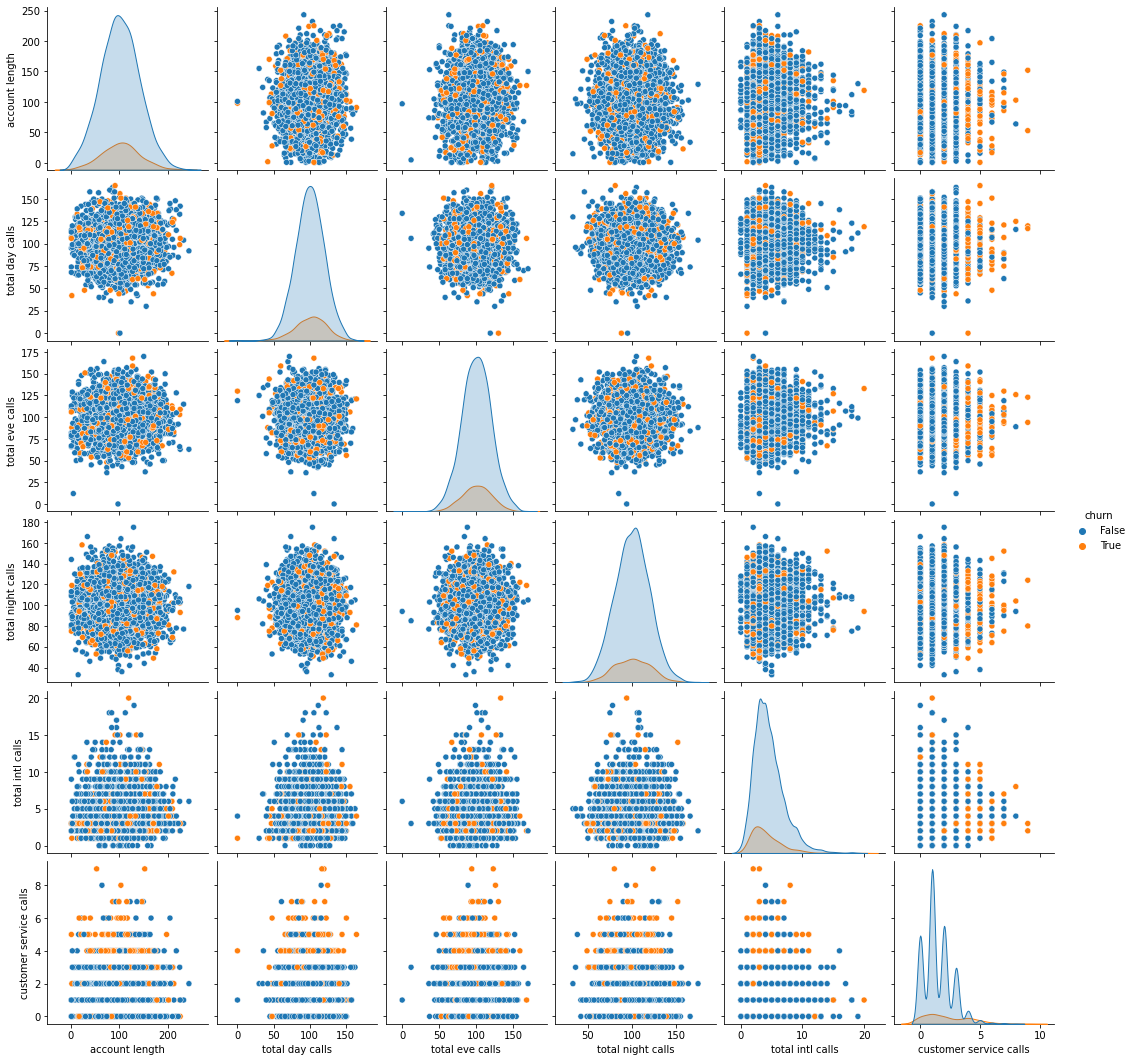

In [283]:
data_temp = df[["account length","total day calls","total eve calls","total night calls",
                "total intl calls","customer service calls","churn"]]
sns.pairplot(data_temp, hue="churn",height=2.5);
plt.show();

### Summary Analysis
The pairplot reveals that while most numeric features (e.g., day, evening, night calls) have overlapping distributions for churned and non-churned customers, customer service calls shows noticeable separation:
- Churned customers tend to have higher call volumes to customer service. 
- No strong linear relationships were observed among call features, confirming low multicollinearity. 
- A few outliers in customer service calls correspond to churners, highlighting them as high-risk customers. 
- Account length and call counts appear evenly distributed across churn status, indicating limited predictive power individually.

### Correlation Heatmap for Numeric Features
- This helps to quantifies relationships between numeric variables above for correlated features and possible removal of redundancy


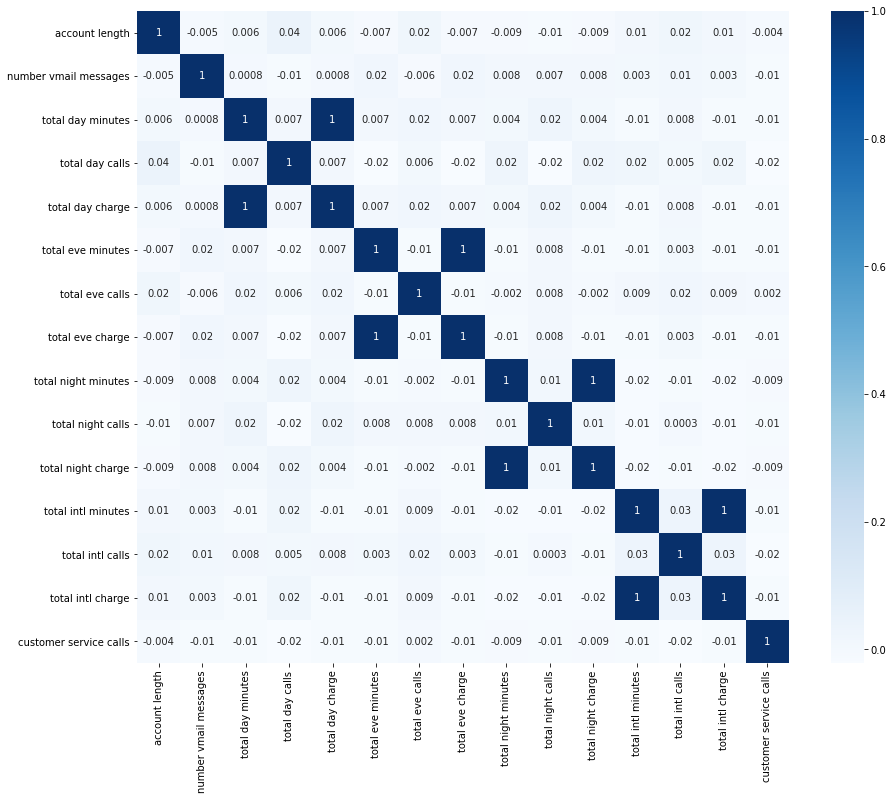

In [284]:
corr_mat = df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.subplots(figsize=(15,12))
sns.heatmap(corr_mat, annot=True, cmap='Blues', square=True,fmt='.0g');
plt.xticks(rotation=90);
plt.yticks(rotation=0);

### Summary Analysis
- The correlation heatmap shows strong multicollinearity between total day minutes and total day charge (corr = 1.0), as well as similar patterns for evening and night periods. This indicates that, these features carry redundant information,henced dropped each pair to avoid multicollinearity in models. 
- Customer service calls has minimal correlation with other numeric features, making it a unique and potentially important predictor of churn. 
- Account length and call count features show low correlation with other variables, suggesting they are relatively independent.

Before dropping redundant features there is need to see the effect of all features (even redundant ones) on churn before deciding which to drop.

## Categorical Features Analysis

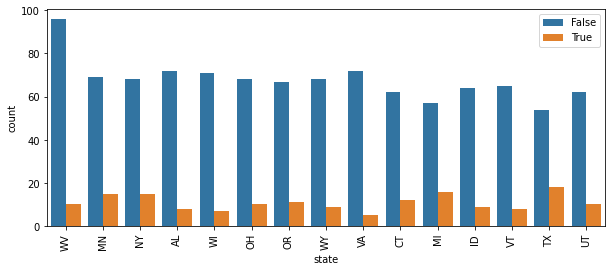

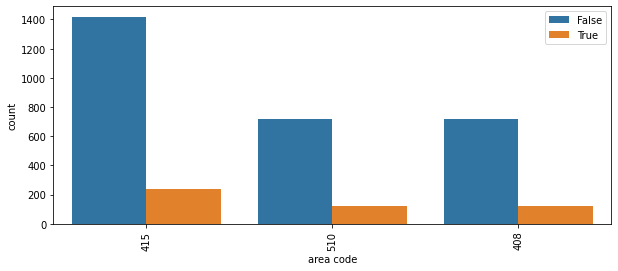

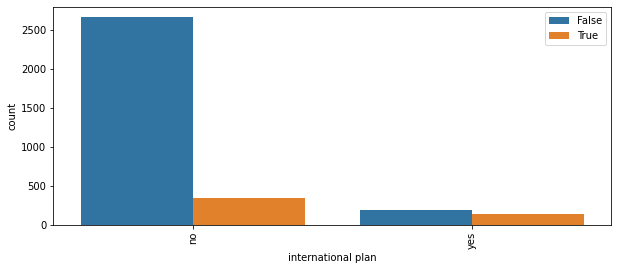

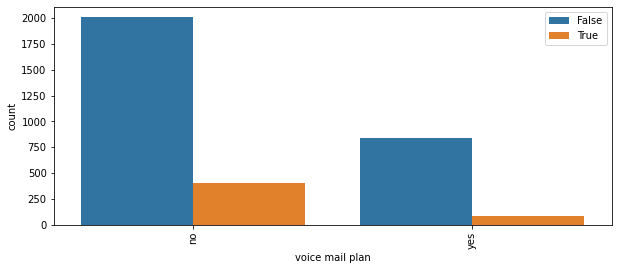

In [285]:
for i in categoric_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=i, hue="churn", data=df,order= df[i].value_counts().iloc[0:15].index)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.show()

### Summary Analysis
The categorical analysis reveals notable differences in churn behavior across some categories. 
- Customers with an international plan exhibit a significantly higher proportion of churn compared to those without the plan, indicating potential dissatisfaction with international pricing or service. 
- Voice mail plan distribution appears balanced across churn status, suggesting limited impact on churn. 
- Area code analysis shows that churn is relatively uniform across most regions, although area code 415 exhibits slightly higher churn. 
- Features with highly imbalanced categories or negligible churn differences may have low predictive value and can be dropped or grouped before modeling.

## Outlier Detection & Treatment
1. Dropping outliers past 3 standard deviations- (z-score greater than 3 (absolute value))

In [286]:
print("Before dropping numerical outliers, length of the dataframe is: ",len(df))
def drop_numerical_outliers(df, z_thresh=3):
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)
    
drop_numerical_outliers(df)
print("After dropping numerical outliers, length of the dataframe is: ",len(df))

Before dropping numerical outliers, length of the dataframe is:  3333
After dropping numerical outliers, length of the dataframe is:  3169


2. Dropping Highly-Correlated Features, dropping features that have a correlation of 0.9 or above.

In [287]:
print("The original dataframe has {} columns.".format(df.shape[1]))
# Calculate the correlation matrix and take the absolute value
corr_matrix = df.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.90)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.90)]

reduced_df = df.drop(to_drop, axis=1) # Drop the features
print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))

The original dataframe has 20 columns.
The reduced dataframe has 16 columns.


### Transforming "Churn" Feature's Rows into 0s and 1s
- This Converting the churn column from categorical (e.g., "yes"/"no") to numeric (0 and 1)

In [288]:
reduced_df['churn'].value_counts()

False    2727
True      442
Name: churn, dtype: int64

This means:

- 2690 customers stayed.
- 437 customers churned.

### One-Hot Encoding

Transforming categorical features into dummy variables as 0 and 1 to be able to use them in classification models.

In [289]:
# One-hot encode selected categorical columns in one line
reduced_df = pd.get_dummies(
    reduced_df,
    columns=['state', 'area code', 'international plan', 'voice mail plan'],
    prefix=['state_is', 'area_code_is', 'international_plan_is', 'voice_mail_plan_is'],
    drop_first=True,
    dtype=np.int64
)

reduced_df.head()


,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,...,state_is_VA,state_is_VT,state_is_WA,state_is_WI,state_is_WV,state_is_WY,area_code_is_415,area_code_is_510,international_plan_is_yes,voice_mail_plan_is_yes
0,128,25,110,45.07,99,16.78,91,11.01,3,2.70,...,0,0,0,0,0,0,1,0,0,1
1,107,26,123,27.47,103,16.62,103,11.45,3,3.70,...,0,0,0,0,0,0,1,0,0,1
2,137,0,114,41.38,110,10.30,104,7.32,5,3.29,...,0,0,0,0,0,0,1,0,0,0
3,84,0,71,50.90,88,5.26,89,8.86,7,1.78,...,0,0,0,0,0,0,0,0,1,0
4,75,0,113,28.34,122,12.61,121,8.41,3,2.73,...,0,0,0,0,0,0,1,0,1,0


### Train-Test Split

Splitting the dataset into training and testing as 70% training and 30% testing

In [290]:
# Split Features and Target
X = reduced_df.drop('churn', axis=1)  # Features
y = reduced_df['churn']   

# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


### Handling Class Imbalance
Applying SMOTE Technique to Resolve Unbalanced 'churn' Feature
- The technique aims to balance class distribution by randomly increasing minority class examples by replicating them.

In [291]:
# applying Synthetic Minority Oversampling Technique ("SMOTE") 
sm = SMOTE(k_neighbors=5, random_state=42)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)
print('Before OverSampling, the shape of X_train: {}'.format(X_train.shape))
print('Before OverSampling, the shape of y_train: {}'.format(y_train.shape)) 
print('After OverSampling, the shape of X_train_over: {}'.format(X_train_over.shape))
print('After OverSampling, the shape of y_train_over: {}'.format(y_train_over.shape))

Before OverSampling, the shape of X_train: (2218, 65)
Before OverSampling, the shape of y_train: (2218,)
After OverSampling, the shape of X_train_over: (3818, 65)
After OverSampling, the shape of y_train_over: (3818,)


Showing visual results interms SMOTE before and after

In [292]:
churn = reduced_df['churn'].value_counts()
transuction = churn.index
quantity = churn.values

# draw pie circule with plotly
figure = px.pie(y_train_over,
               values = quantity,
               names = transuction,
               hole = .3,
               title = 'Distribution of Churn - Before SMOTE')
figure.show()

In [293]:
y_train_over_df = y_train_over.to_frame()
churn = y_train_over_df['churn'].value_counts()
transuction = churn.index
quantity = churn.values

# draw pie circule with plotly
figure = px.pie(y_train_over_df,
               values = quantity,
               names = transuction,
               hole = .3,
               title = 'Distribution of Churn - After SMOTE')
figure.show()

### Feature Scaling

In [294]:
# Ensure target is not in X datasets
if 'churn' in X_train_over.columns:
    X_train_over = X_train_over.drop(columns=['churn'])

if 'churn' in X_test.columns:
    X_test = X_test.drop(columns=['churn'])

# Get numeric features
numeric_features = X_train_over.select_dtypes(include=[np.number]).columns.tolist()

# Apply StandardScaler
scaler = StandardScaler()
X_train_over[numeric_features] = scaler.fit_transform(X_train_over[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

print("Scaling complete. Features scaled:", numeric_features)


Scaling complete. Features scaled: ['account length', 'number vmail messages', 'total day calls', 'total day charge', 'total eve calls', 'total eve charge', 'total night calls', 'total night charge', 'total intl calls', 'total intl charge', 'customer service calls', 'state_is_AL', 'state_is_AR', 'state_is_AZ', 'state_is_CA', 'state_is_CO', 'state_is_CT', 'state_is_DC', 'state_is_DE', 'state_is_FL', 'state_is_GA', 'state_is_HI', 'state_is_IA', 'state_is_ID', 'state_is_IL', 'state_is_IN', 'state_is_KS', 'state_is_KY', 'state_is_LA', 'state_is_MA', 'state_is_MD', 'state_is_ME', 'state_is_MI', 'state_is_MN', 'state_is_MO', 'state_is_MS', 'state_is_MT', 'state_is_NC', 'state_is_ND', 'state_is_NE', 'state_is_NH', 'state_is_NJ', 'state_is_NM', 'state_is_NV', 'state_is_NY', 'state_is_OH', 'state_is_OK', 'state_is_OR', 'state_is_PA', 'state_is_RI', 'state_is_SC', 'state_is_SD', 'state_is_TN', 'state_is_TX', 'state_is_UT', 'state_is_VA', 'state_is_VT', 'state_is_WA', 'state_is_WI', 'state_is_WV'

### Modeling

#### Model 1. Logistic Regression Classifier

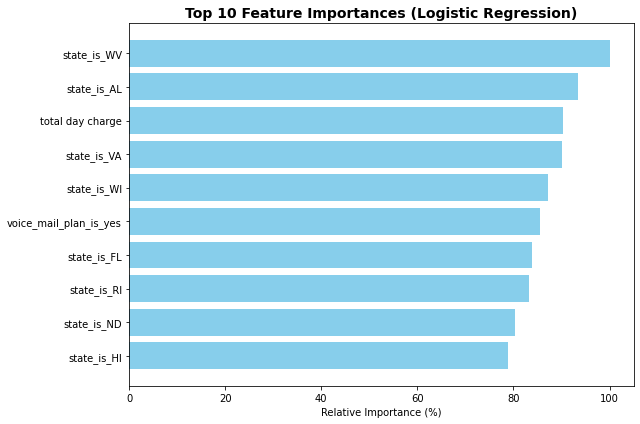

In [295]:
# Get absolute coefficients from logistic regression model
feature_importance = np.abs(lr.coef_[0])

# Normalize for better visualization
feature_importance = 100.0 * (feature_importance / feature_importance.max())

# Sort indices for top 10 features
sorted_idx = np.argsort(feature_importance)[-10:]  # Top 10 highest coefficients
top_features = np.array(X_train_over.columns)[sorted_idx]
top_importances = feature_importance[sorted_idx]

# Plot
plt.figure(figsize=(9, 6))
plt.barh(top_features, top_importances, color='skyblue')
plt.title('Top 10 Feature Importances (Logistic Regression)', fontsize=14, fontweight='bold')
plt.xlabel('Relative Importance (%)')
plt.tight_layout()
plt.show()


In [296]:
coef_df = pd.DataFrame({
    'Feature': X_train_over.columns,
    'Coefficient': lr.coef_[0],
    'Abs_Importance': np.abs(lr.coef_[0])
}).sort_values(by='Abs_Importance', ascending=False)

print(coef_df.head(10))


                   Feature  Coefficient  Abs_Importance
59             state_is_WV    -0.886542        0.886542
11             state_is_AL    -0.828967        0.828967
3         total day charge     0.800500        0.800500
55             state_is_VA    -0.799365        0.799365
58             state_is_WI    -0.772108        0.772108
64  voice_mail_plan_is_yes    -0.758537        0.758537
19             state_is_FL    -0.743883        0.743883
49             state_is_RI    -0.737558        0.737558
38             state_is_ND    -0.711420        0.711420
21             state_is_HI    -0.699552        0.699552


### Analysis of the coefficient
- Positive coefficients - increase churn likelihood.
- Negative coefficients - decrease churn likelihood.

In [297]:
print(classification_report(y_test, y_pred_lr, target_names=['0', '1']))


              precision    recall  f1-score   support

           0       0.90      0.94      0.92       818
           1       0.47      0.32      0.38       133

    accuracy                           0.85       951
   macro avg       0.68      0.63      0.65       951
weighted avg       0.84      0.85      0.84       951



### Key points noted
- 0 → Non-churn customers
- 1 → Churn customers
- Focus on  F1-score and Recall for class 1 (churn).



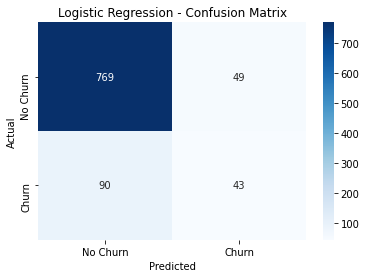

In [298]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn','Churn'], yticklabels=['No Churn','Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()


- TN (True Negatives) = 769 - Actual = No Churn, Predicted = No Churn
- FP (False Positives) = 49 - Actual = No Churn, Predicted = Churn
- FN (False Negatives) =90 - Actual = Churn, Predicted = No Churn
- TP (True Positives) = 43 - Actual = Churn, Predicted = Churn

### Business Impact
- False Negatives (FN) are most critical as they show that these customers churn without being flagged for retention.
- False Positives (FP) waste retention resources but are less harmful.
- Basically both TP and FN should be kept low.

### ROC Curve & AUC for Logistic Regression

ROC-AUC Score: 0.7918635218853981


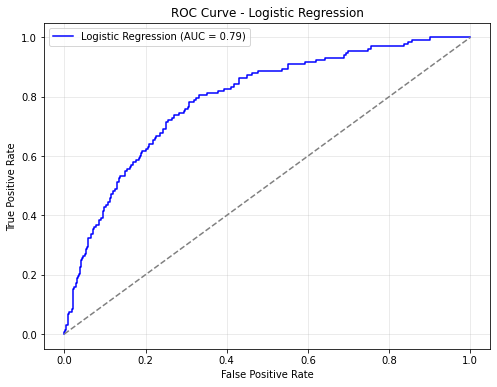

In [299]:
# Get predicted probabilities for the positive class (churn = 1)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_prob_lr)
print("ROC-AUC Score:", auc_score)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


AUC = 0.79, the model has a good ability to separate churn vs. non-churn customers.

### Model 2 - Random Forest Classifier


Random Forest Classification Report:

              precision    recall  f1-score   support

    No Churn       0.94      0.91      0.93       818
       Churn       0.54      0.64      0.59       133

    accuracy                           0.87       951
   macro avg       0.74      0.78      0.76       951
weighted avg       0.88      0.87      0.88       951

ROC-AUC Score: 0.8790466386013934


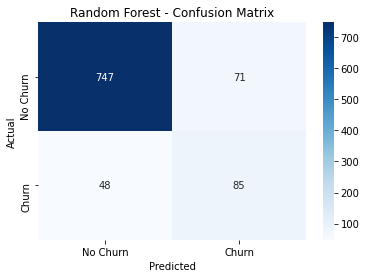

In [300]:
# Initialize Random Forest
rf = RandomForestClassifier(
    n_estimators=200,      # Number of trees
    max_depth=None,        # Let it grow fully (or tune)
    class_weight='balanced', # Handle imbalance
    random_state=42
)

# Train the model
rf.fit(X_train_over, y_train_over)

# Predictions
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

# Evaluation Metrics
print("\nRandom Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf, target_names=['No Churn','Churn']))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn','Churn'], yticklabels=['No Churn','Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')
plt.show()


Interpretation of the matrix
- TN = 747: Correctly predicted non-churn.
- FP = 71: greater than LR -  unnecessary retention actions.
- FN = 48: Much lower than LR - RF catches more churn customers (good).
- TP = 85: Highest so far - great for business retention strategy.

To show important feature, RF is used as below visual

total day charge          0.172613
total eve charge          0.075399
total night charge        0.067556
account length            0.060869
customer service calls    0.058860
total intl charge         0.058289
total night calls         0.054016
total day calls           0.053031
total eve calls           0.052664
total intl calls          0.048549
dtype: float64


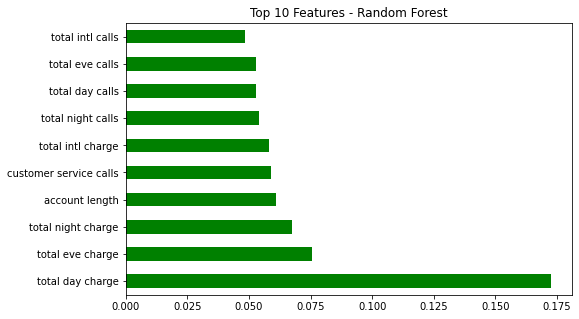

In [301]:
# Feature Importances
importances = pd.Series(rf.feature_importances_, index=X_train_over.columns).sort_values(ascending=False)
print(importances.head(10))  # Top 10 features

# Plot
plt.figure(figsize=(8,5))
importances.head(10).plot(kind='barh', color='green')
plt.title('Top 10 Features - Random Forest')
plt.show()


Random Forest ROC-AUC Score: 0.8790


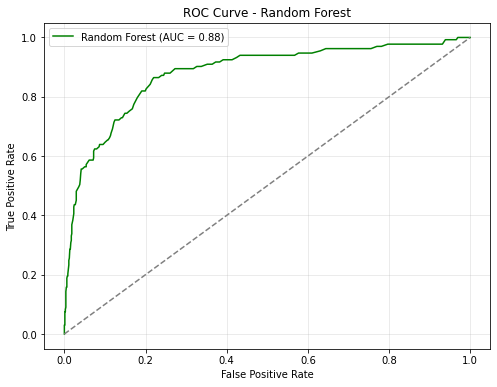

In [302]:
# Get predicted probabilities for class 1 (churn)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve values
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)

# Compute AUC
auc_rf = roc_auc_score(y_test, y_prob_rf)
print(f"Random Forest ROC-AUC Score: {auc_rf:.4f}")

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, color='green', label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')  # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


#### RF AUC = 88%

#### ROC-AUC
- Comparing RF AUC & LR AUC, it is evident that RF 88% perform better than LR 79%, which means RF has better overall ability to discriminate between churn and non-churn.

### General Comaparison between LR and RF
- Random Forest outperforms Logistic Regression in recall and AUC, making it more effective for churn prediction. It identifies more churn customers correctly while maintaining strong precision, reducing missed opportunities for retention campaigns. Feature importance shows that customer service calls and international plan are the most influential predictors.

### Model 3 - Decision Tree Classifier


Decision Tree Classification Report:

              precision    recall  f1-score   support

    No Churn       0.94      0.80      0.86       818
       Churn       0.35      0.66      0.46       133

    accuracy                           0.78       951
   macro avg       0.64      0.73      0.66       951
weighted avg       0.85      0.78      0.81       951

ROC-AUC Score: 0.7324163097229627


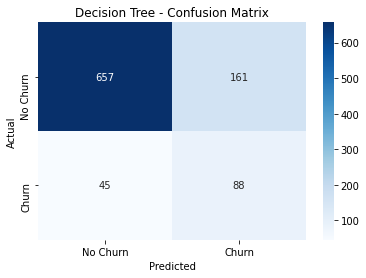

In [303]:
# Initialize Decision Tree
dt = DecisionTreeClassifier(
    max_depth=None,       # Allow full growth (or tune later)
    class_weight='balanced', # Handle imbalance
    random_state=42
)

# Train the model
dt.fit(X_train_over, y_train_over)

# Predictions
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:,1]

# Evaluation
print("\nDecision Tree Classification Report:\n")
print(classification_report(y_test, y_pred_dt, target_names=['No Churn','Churn']))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn','Churn'], yticklabels=['No Churn','Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree - Confusion Matrix')
plt.show()


In [304]:
# Compute ROC curve values
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
auc_dt = roc_auc_score(y_test, y_prob_dt)
print(f"Decision Tree ROC-AUC Score: {auc_dt:.4f}")


Decision Tree ROC-AUC Score: 0.7324


### Now Combine All Three Models in One ROC Plot
- Logistic Regression, Random Forest, Decision Tree

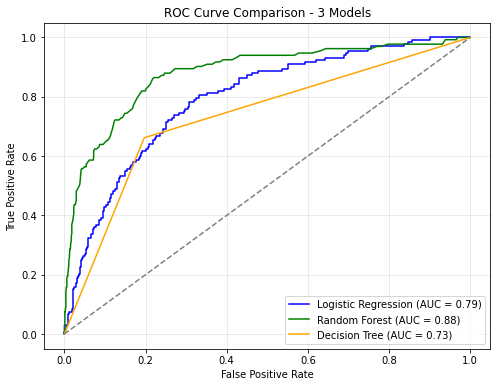

In [305]:

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_lr):.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', label=f'Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})')
plt.plot(fpr_dt, tpr_dt, color='orange', label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison - 3 Models')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


#### From the curve, the farthest from the diagonal and highest AUC is the best model.
- Whis is Random Forest > Logistic Regression > Decision Tree

#### Table comparison of Precision, Recall, F1 & AUC for all the three models

In [306]:
# Calculate metrics for each model
metrics = {
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_dt)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_dt)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_dt)
    ],
    'F1-score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_dt)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_prob_lr),
        roc_auc_score(y_test, y_prob_rf),
        roc_auc_score(y_test, y_prob_dt)
    ]
}

# Create DataFrame
comparison_df = pd.DataFrame(metrics)

# Round for better readability
comparison_df = comparison_df.round(3)

print("\nModel Performance Comparison:\n")
print(comparison_df)



Model Performance Comparison:

                 Model  Accuracy  Precision  Recall  F1-score  ROC-AUC
0  Logistic Regression     0.854      0.467   0.323     0.382    0.792
1        Random Forest     0.875      0.545   0.639     0.588    0.879
2        Decision Tree     0.783      0.353   0.662     0.461    0.732


### Further analysis from the above
- Random Forest: Best overall performance, highest ROC-AUC, best balance of precision and recall which is most suitable for churn prediction.
- Logistic Regression: Good baseline, but slightly weaker on recall (misses more churn customers).
- Decision Tree: Similar to LR but slightly better recall, though risk of overfitting if not tuned.

### Business Insights from Feature Importance
From Random Forest & Logistic Regression:
- Top churn drivers:
   - Customer Service Calls,  More calls = dissatisfaction.
   - International Plan , Customers with this plan churn more.
   - Total Day Minutes / Charges , High usage correlates with churn.

- Actionable Steps:
   - Monitor customers with frequent service calls for proactive retention.
   - Review pricing for international plans to reduce dissatisfaction.
   - Target high-usage customers with loyalty rewards.

### Recommended Model
- Random Forest Classifier:
   - Best predictive performance.
   - Can handle both numeric & categorical variables without scaling.
   - Provides feature importance for actionable insights.